In [1]:
import sklearn
sklearn.__version__

'0.24.1'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
dataset = pd.read_csv('Causes.csv')
df = pd.DataFrame(dataset)
df.head(20)

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149
5,Alabama,2004,92,4530729,2,1.6,2.5,155
6,Alabama,2005,83,4569805,1.8,1.4,2.3,163
7,Alabama,2006,134,4628981,2.9,2.4,3.4,174
8,Alabama,2007,172,4672840,3.7,3.1,4.2,184
9,Alabama,2008,195,4718206,4.1,3.6,4.7,196


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   State                                                            816 non-null    object
 1   Year                                                             816 non-null    int64 
 2   Deaths                                                           816 non-null    object
 3   Population                                                       816 non-null    int64 
 4   Crude Rate                                                       816 non-null    object
 5   Crude Rate Lower 95% Confidence Interval                         816 non-null    object
 6   Crude Rate Upper 95% Confidence Interval                         816 non-null    object
 7   Prescriptions Dispensed by US Retailers in that year (

In [6]:
drop_rows = df[ (df['Deaths'] == 'Suppressed') | (df['Deaths'] == 'Unreliable') | (df['Crude Rate'] == 'Suppressed') | (df['Crude Rate'] == 'Unreliable') ].index
df.drop(drop_rows , inplace=True)
df.head(20)

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149
5,Alabama,2004,92,4530729,2,1.6,2.5,155
6,Alabama,2005,83,4569805,1.8,1.4,2.3,163
7,Alabama,2006,134,4628981,2.9,2.4,3.4,174
8,Alabama,2007,172,4672840,3.7,3.1,4.2,184
9,Alabama,2008,195,4718206,4.1,3.6,4.7,196


In [7]:
del df['State']
df.head()

,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,1999,39,4430141,0.9,0.6,1.2,116
1,2000,46,4447100,1,0.8,1.4,126
2,2001,67,4467634,1.5,1.2,1.9,138
3,2002,75,4480089,1.7,1.3,2.1,142
4,2003,54,4503491,1.2,0.9,1.6,149


In [8]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 815
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Year                                                             772 non-null    int64  
 1   Deaths                                                           772 non-null    int64  
 2   Population                                                       772 non-null    int64  
 3   Crude Rate                                                       772 non-null    float64
 4   Crude Rate Lower 95% Confidence Interval                         772 non-null    float64
 5   Crude Rate Upper 95% Confidence Interval                         772 non-null    float64
 6   Prescriptions Dispensed by US Retailers in that year (millions)  772 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 48.2 KB

In [9]:
X = df.drop('Deaths', axis = 1)
y = df['Deaths']

In [10]:
X.tail()

,Year,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
811,2010,563626,8.7,6.4,11.5,210
812,2011,568158,8.3,6.1,11.0,219
813,2012,576412,8.2,6.0,10.8,217
814,2013,582658,8.9,6.7,11.7,207
815,2014,584153,9.8,7.4,12.6,196


In [11]:
y.tail()

811    49
812    47
813    47
814    52
815    57
Name: Deaths, dtype: int64

In [12]:
X.isnull().sum()

Year                                                               0
Population                                                         0
Crude Rate                                                         0
Crude Rate Lower 95% Confidence Interval                           0
Crude Rate Upper 95% Confidence Interval                           0
Prescriptions Dispensed by US Retailers in that year (millions)    0
dtype: int64

In [13]:
X_train = X[:70]
y_train = y[:70]

X_test = X[70:]
y_test = y[70:]

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
freg = RandomForestRegressor(n_estimators = 100)
freg.fit(X_train, y_train)
freg.score(X_test, y_test)

0.560211450301115

In [22]:
freg.score(X_train, y_train)

0.995871709363475

In [16]:
import math
p1 = freg.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, p1)
rmse = math.sqrt(mse)
print(rmse)

240.14008002453076


In [17]:
from sklearn.svm import SVR

In [18]:
from sklearn.model_selection import GridSearchCV

In [25]:
svr = SVR()
parameters = {'kernel' : ('linear', 'rbf', 'poly'),
             'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000],
             'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
             }
cv = GridSearchCV(svr, parameters, cv = 2)

Text(0.5, 1.0, 'Relationship between Years and Population')

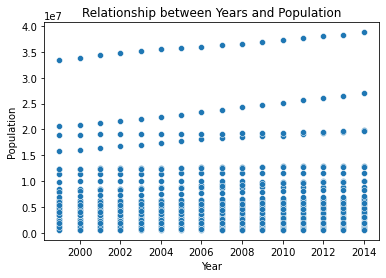

In [20]:
sns.scatterplot(data = df, x = "Year", y = "Population").set_title("Relationship between Years and Population")

<AxesSubplot:xlabel='Year', ylabel='Deaths'>

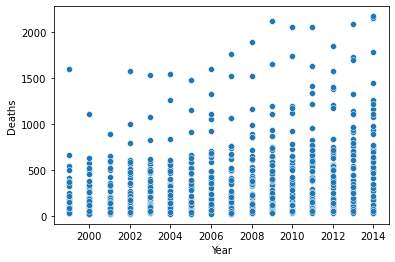

In [21]:
sns.scatterplot(data = df, x = "Year", y = "Deaths")

Text(0.5, 1.0, 'Relationship between Population and Opioid Overdose Deaths')

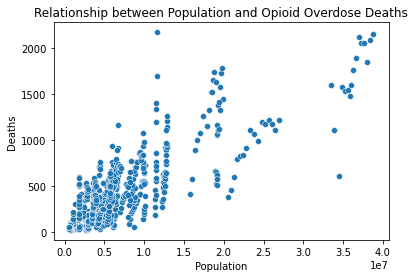

In [24]:
sns.scatterplot(data = df, x = "Population", y = "Deaths").set_title("Relationship between Population and Opioid Overdose Deaths")